Genere una imagen de 256x256x1 con valores 255 y 0 de color blanco. Genere una cuadrícula de 8x8 negra de 2 pixeles de grosor a lo largo de toda la imagen.

In [26]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [27]:
img = [[255]*256 for _ in range(256)]
i = 1
while i < 256:
    for j in range(256):
        img[i][j] = 0
        img[i - 1][j] = 0
    for j in range(256):
        img[j][i] = 0
        img[j][i - 1] = 0
    i += 32
img = np.array(img, dtype=np.uint8)

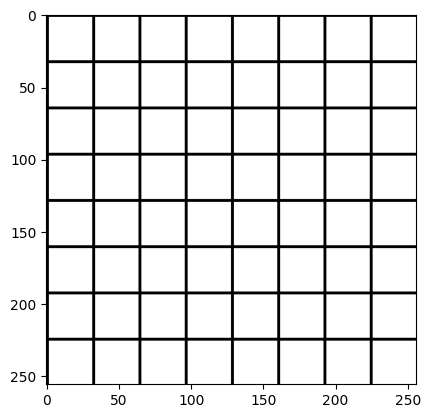

In [28]:
plt.imshow(img, cmap='gray')
plt.show()

# Submuestreo

In [29]:
imagen_r =  cv2.resize(img, (128,128), interpolation=cv2.INTER_NEAREST)

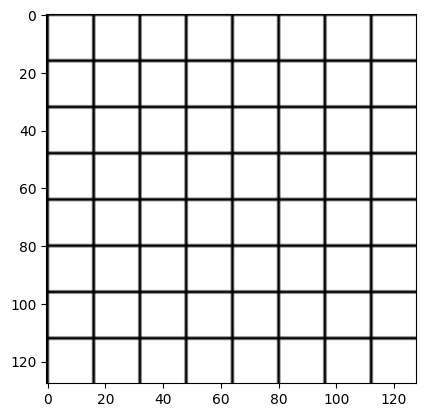

In [30]:
plt.imshow(imagen_r, cmap='gray')
plt.show()

Como se puede apreciar la imagen ha perdido algo de calidad al reducir su espacio pero mostrarla al mismo tamaño que la original, esto debido a que ahora existen menos pixeles para mostrar la imagen y por esto estos deben de ser más grandes, esto significa que la imagen redimensionada tiene menos detalle que la original, ya que cada píxel ahora representa un área más grande de la escena. Debido a que las dimensiones de la foto original y la reducida cumplen una relación de 2:1. Se podría decir que el pixel de la foto reducida tiene un tamaño 2 veces mayor que el de la foto original, lo cual causa una reducción en la resolución de la imagen. Además el método utilizado influye tambien, en este caso, se utilizó la interpolación INTER_NEAREST, que simplemente toma el valor del píxel más cercano sin suavizar la imagen. Esto puede provocar que la imagen redimensionada tenga un aspecto más "pixelado" o menos suave.

# Tecnicas de interpolación

In [46]:
img_nearest = cv2.resize(img, (128, 128), interpolation=cv2.INTER_NEAREST)
img_bilinear = cv2.resize(img, (128, 128), interpolation=cv2.INTER_LINEAR)
img_bicubic = cv2.resize(img, (128, 128), interpolation=cv2.INTER_CUBIC)

Se escogieron tres técnicas de interpolación: Nearest Neighbour, Interpolación bilineal y interpolación bicubica.

Nearest Neighbour: Asigna el valor del píxel más cercano en la imagen original al píxel en la imagen redimensionada.

Interpolación bilineal:Calcula un promedio ponderado de los 4 píxeles más cercanos en la imagen original.

Interpolación bicúbica: Utiliza un promedio ponderado de los 16 píxeles más cercanos en la imagen original.

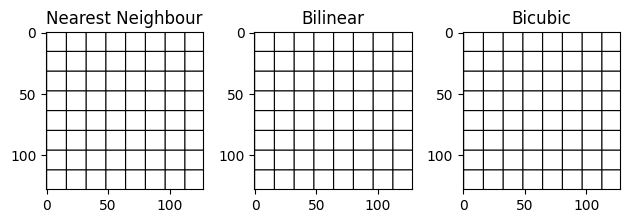

In [43]:
fig, axes = plt.subplots(1,3)  
axes[0].imshow(img_nearest, cmap='gray')
axes[0].set_title('Nearest Neighbour')
axes[1].imshow(img_bilinear, cmap='gray')
axes[1].set_title('Bilinear')
axes[2].imshow(img_bicubic, cmap='gray')
axes[2].set_title('Bicubic')

plt.tight_layout()
plt.show()

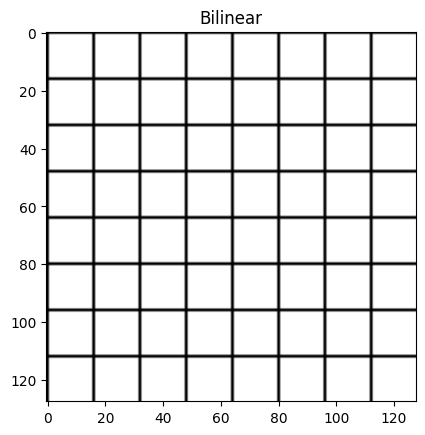

In [40]:
plt.imshow(img_bilinear, cmap='gray')
plt.title('Bilinear')
plt.show()

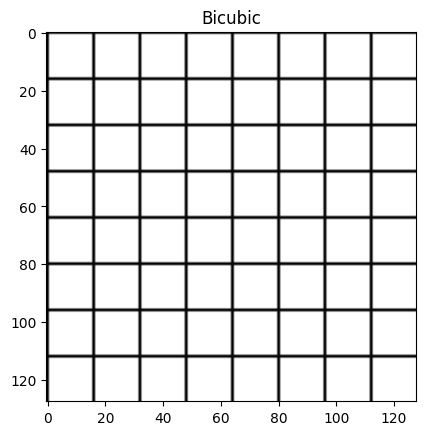

In [41]:
plt.imshow(img_bicubic, cmap='gray')
plt.title('Bicubic')
plt.show()

Con respecto a resolución o niveles de gris no se logra ver ninguna diferencia entre las tres tecnicas esocogidas. Es posible que sea debido a que es un patrón geométrico de solo dos colores, por lo que los tres logran un trabajo similar.

# Técnicas de interpolacion 100x100

In [42]:
img_nearest_100 = cv2.resize(img, (100, 100), interpolation=cv2.INTER_NEAREST)
img_bilinear_100 = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
img_bicubic_100 = cv2.resize(img, (100, 100), interpolation=cv2.INTER_CUBIC)

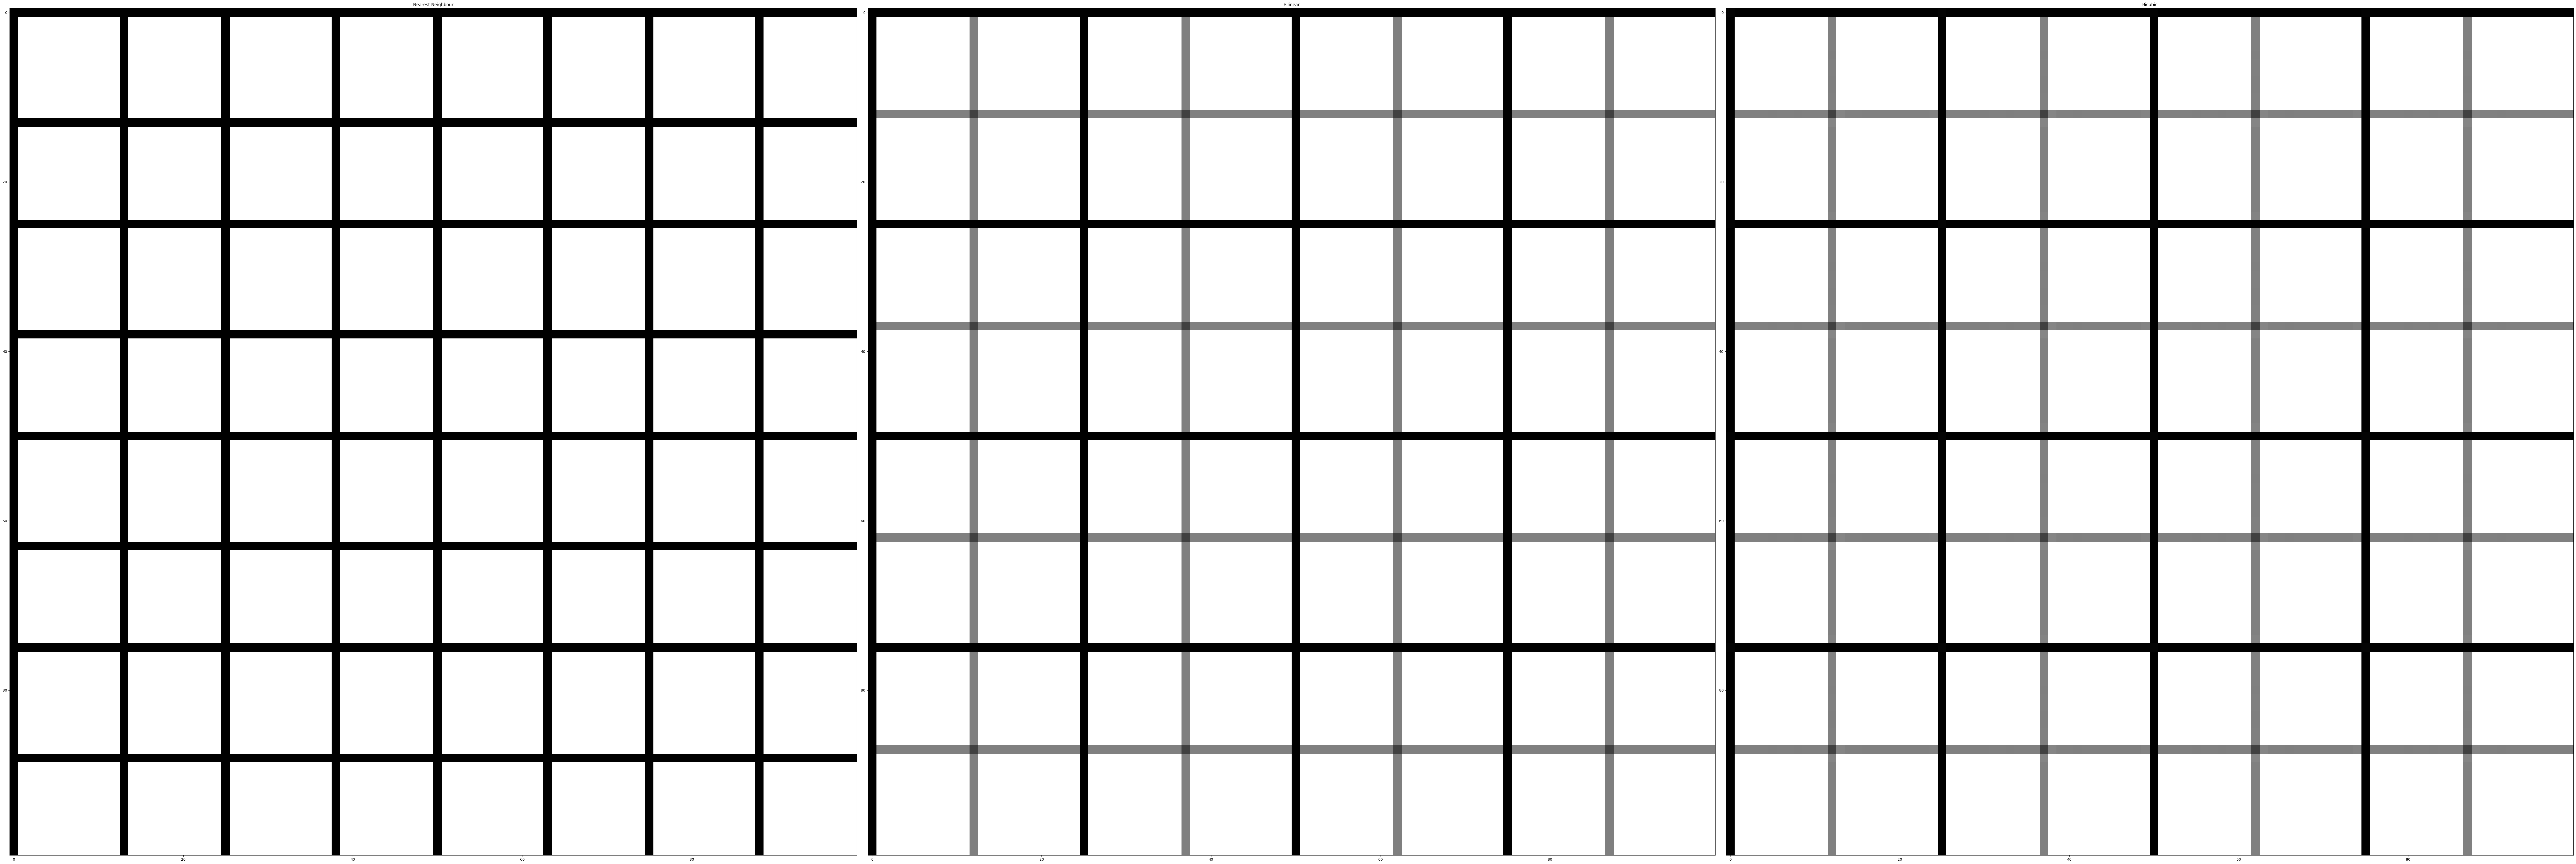

In [ ]:
fig, axes = plt.subplots(1,3)  
axes[0].imshow(img_nearest_100, cmap='gray')
axes[0].set_title('Nearest Neighbour')
axes[1].imshow(img_bilinear_100, cmap='gray')
axes[1].set_title('Bilinear')
axes[2].imshow(img_bicubic_100, cmap='gray')
axes[2].set_title('Bicubic')

plt.tight_layout()
plt.show()

Como se puede apreciar en las imagenes de arriba, ahora si se logra apreciar una diferencia entre las diferentes técnicas. Pues nearest neighbout mantiene una cuadricula más uniforme mientras que bilinear y bicubic tienes problemas para mantener el grosor uniforme que tiene toda la cuadricula, ya que alguna lineas se ven más delgadas que otras.

# Imagen de trabajo

In [94]:
from PIL import Image
import pillow_avif

torax = Image.open("images/torax.avif")
torax = np.array(torax)

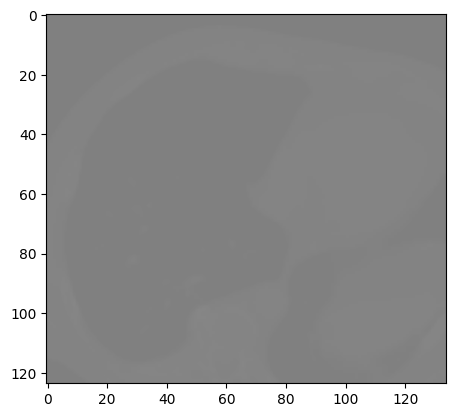

In [95]:
plt.imshow(torax, cmap='gray')
plt.show()

# Submuestreo 34x31

In [97]:
torax1 = cv2.resize(torax, (34, 31), interpolation=cv2.INTER_NEAREST)
torax2 = cv2.resize(torax, (34, 31), interpolation=cv2.INTER_LINEAR)
torax3 = cv2.resize(torax, (34, 31), interpolation=cv2.INTER_CUBIC)

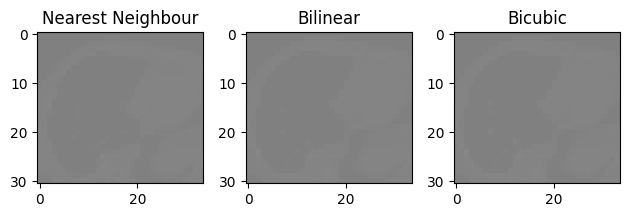

In [98]:
fig, axes = plt.subplots(1,3,)  
axes[0].imshow(torax1, cmap='gray')
axes[0].set_title('Nearest Neighbour')
axes[1].imshow(torax2, cmap='gray')
axes[1].set_title('Bilinear')
axes[2].imshow(torax3, cmap='gray')
axes[2].set_title('Bicubic')

plt.tight_layout()
plt.show()